<a href="https://colab.research.google.com/github/C0SS10/AI4ENG-II/blob/main/House-Price-Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📦 Módulos, archivos, paquetes importantes para la ejecución del notebook.**

In [1]:
# Librerias uso básico
import numpy as np
import pandas as pd

# Librerias para gráficar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import requests
from io import StringIO

url = 'https://drive.google.com/uc?export=download&id=1J_gjK0b1F9JkvlNEj-t8fiHcTA6K8fO2'

response = requests.get(url)
response.raise_for_status()
data_csv = StringIO(response.text)

Obteniendo el conjunto de datos desde Drive 🔽

## **🧰 Prepocesamiento de datos**

In [3]:
house_data = pd.read_csv(data_csv).drop(['Unnamed: 0'], axis=1)

house_data.head()

,City,Price,Area,Location,No. of Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,Bangalore,8358000,1675,Doddanekundi,3
4,Bangalore,6845000,1670,Kengeri,3


🤓 Leemos el archivo .csv y a su vez eliminamos la columna llamada 'Unnamed: 0' porque creemos que nos da información que no es importante/utilizable.

- 🏙️ La categoria 'City' proporciona información sobre los lugares de la india donde se ofertaron las casas.
- 💰 'Price' nos dice cuánto vale la casa en cuestión, el valor consideramos que está en Rupias (el dataset no ofrece información sobre la columna).
- 🏙 Luego está 'Area' es el espacio que ocupa la casa y está dado en pies cuadrados.
- 📮 'Location' nos da el nombre de la zona/barrio/municipio/dirección.
- 🛌 Por último está el número de dormitorios que tiene la casa.

In [4]:
# Revisando si el dataset tiene valores nulos
house_data_nan = house_data.isnull().sum() * 100
house_data_nan

City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

❌ Vemos que el dataset no cuenta con datos nulos en ninguna de su columna. El resultado está en unidades de porcentaje.

In [5]:
# Resumen estadistico del dataset
house_data.describe()

,Price,Area,No. of Bedrooms
count,2.913500e+04,29135.000000,29135.000000
mean,1.195267e+07,1301.816475,2.421074
std,2.387647e+07,767.862339,0.821016
min,2.000000e+06,200.000000,1.000000
25%,4.179999e+06,870.000000,2.000000
50%,6.884999e+06,1137.000000,2.000000
75%,1.230000e+07,1504.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


- 💰La media de los precios es: 11952670₹ Rupias
- 💰La casa más cara tiene un valor de 854600000₹ Rupias
- 🏠El espacio medio que ocupa una casa es de 1301 pies cuadrados
- 🏠La casa más pequeña ocupa 200 pies cuadrados
- 🏠La vivienda más grande tiene 16000 pies cuadrados
- 🛌La media de habitaciones se encuentra en 2 habitaciones aproximadamente.

In [6]:
# Resumen estadistico para variables categóricas
house_data.describe(include=['object'])

,City,Location
count,29135,29135
unique,6,1776
top,Mumbai,New Town
freq,6925,687


- 🖋️ En el dataset tenemos 29135 observaciones
- 📍 6 ciudades únicas y 1776 zonas/barrios
- 📍 La ciudad que más se repite es Mumbai con 6925 observaciones
- 🖋️ El barrio/zona de New Town tiene 687 observaciones asociadas.

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             29135 non-null  object
 1   Price            29135 non-null  int64 
 2   Area             29135 non-null  int64 
 3   Location         29135 non-null  object
 4   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


📄 Información adicional del objeto 'DataFrame'

## **👀 Exploración de datos**

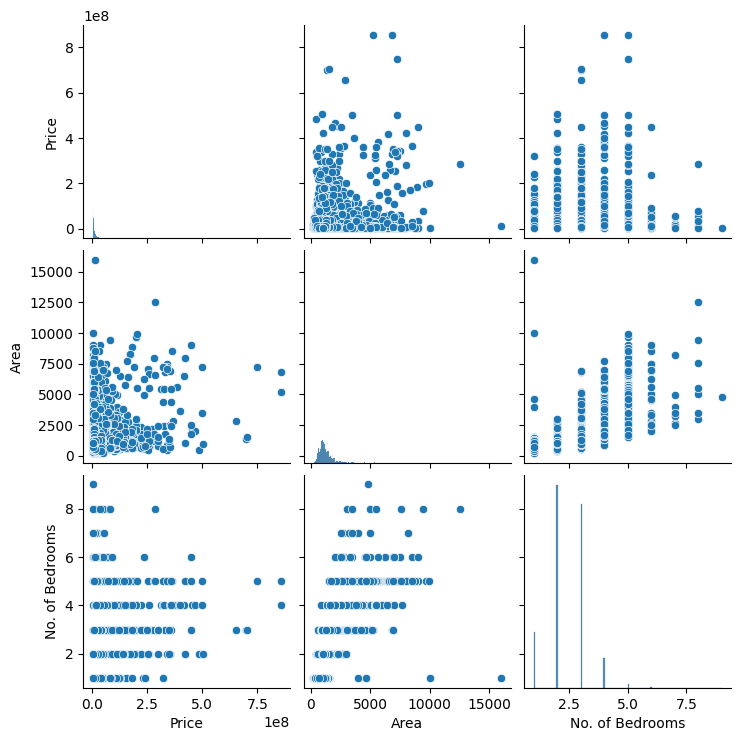

In [8]:
sns.pairplot(house_data, diag_kind="hist")

- En la diagonal principal se muestra la distribucion de cada variable continua, se puede apreciar una cola a la izquierda en cada una.

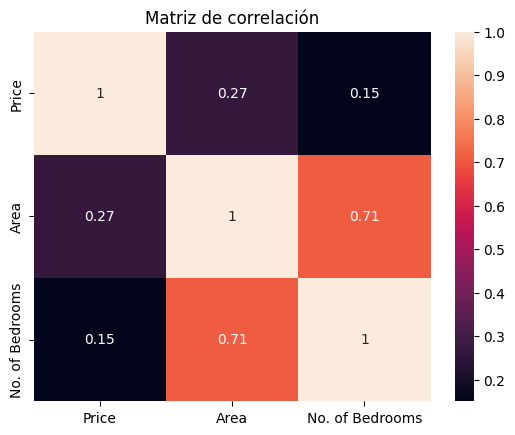

<Figure size 800x800 with 0 Axes>

In [9]:
matriz_correlacion = house_data.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación")
plt.figure(figsize=(8, 8))
plt.show()

- 📊 Hay una correlación positiva moderada entre 'Price' y 'Area'. El precio puede cambiar si se cambia el 'Area'
- 📊 Correlación débil entre 'Price' y 'No. Of Bedrooms'. La cantidad de habitaciones no cambia tanto el precio de la casa.
- 📊 Se tiene una correlación fuerte entre 'Area' y 'No. Of Bedrooms'. Si se cambia el area de la casa es probable que el número de habitaciones aumente.

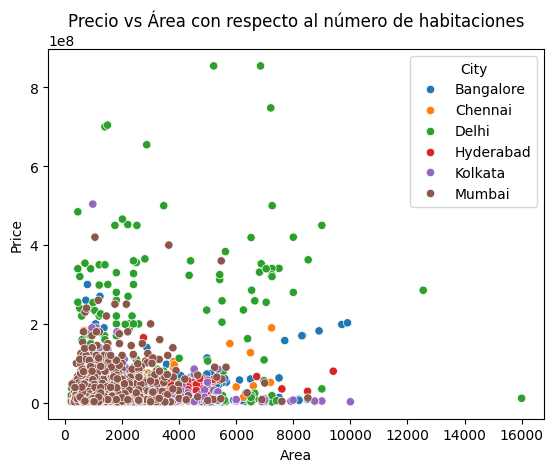

In [10]:
sns.scatterplot(x='Area', y='Price', data=house_data, hue='City')
plt.title('Precio vs Área con respecto al número de habitaciones')
plt.show()

- 🏠 Las casas en Delhi son las más caras.
- 🏠 Mumbai y Kolkata tienen las casas más baratas.
- 🏠 La mayoría de casas tienen un Area de 0 a 6000

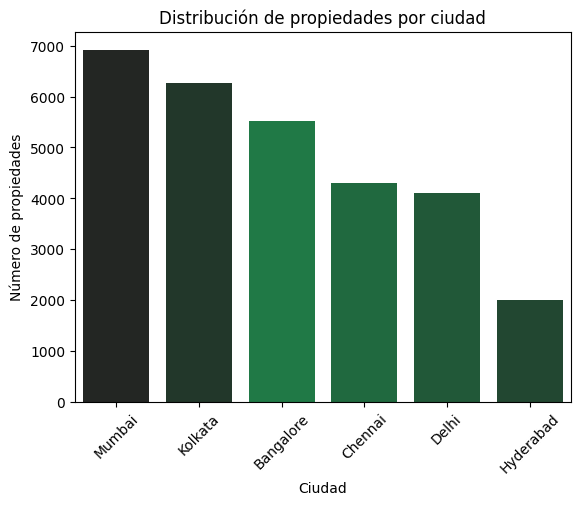

In [11]:
sns.countplot(x='City', data=house_data, order=house_data['City'].value_counts().index, hue='City', palette='dark:#184_r')
plt.title('Distribución de propiedades por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=45)
plt.show()

- 🏠 Hay aproximadamente 4000 ofertas de casas en Delhi
- 🏠 Hyderabad tiene la menor oferta, aunque no afecta al precio.

## **🔎 Detección de datos atipicos**

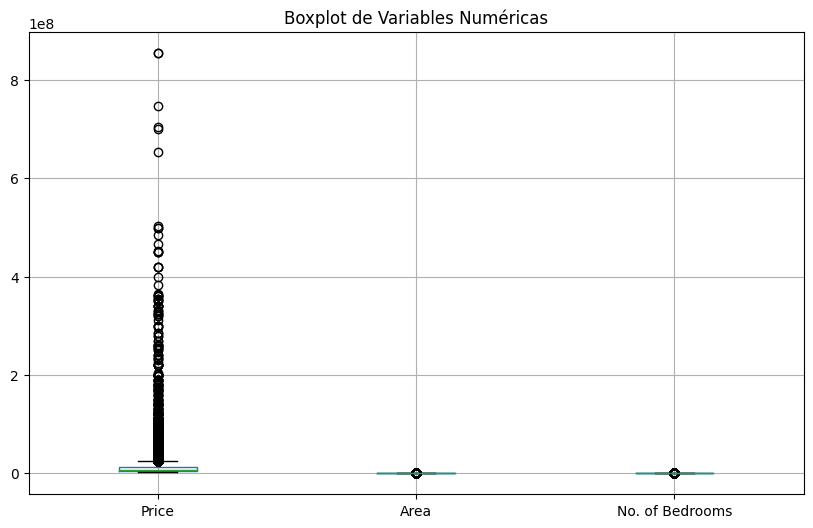

In [12]:
# Visualizar boxplots de variables numéricas
plt.figure(figsize=(10, 6))
house_data.boxplot(column=['Price', 'Area', 'No. of Bedrooms'])
plt.title('Boxplot de Variables Numéricas')
plt.show()

- 👀 Vemos que la variable precio tienes valores atipicos, esto es problematico para el modelo ya que puede generar interpretaciones engañosas.

In [13]:
Q1 = house_data.iloc[:, 2:].quantile(0.25, numeric_only=True)
Q3 = house_data.iloc[:, 2:].quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Identificación de atípicos
atipicos = ((house_data.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (house_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)

<ipython-input-13-45a8c98ca049>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  atipicos = ((house_data.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (house_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-13-45a8c98ca049>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  atipicos = ((house_data.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (house_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)


In [14]:
atipicos.value_counts()

False    27425
True      1710
dtype: int64

👓 Vemos que existen 1710 datos atipicos, los cuales puedes afectar al modelo.

In [15]:
house_data[atipicos].head()

,City,Price,Area,Location,No. of Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
6,Bangalore,20000000,2502,Thanisandra,4
22,Bangalore,23700000,2470,Sahakar Nagar,4
29,Bangalore,23100000,2480,Banashankari,3
60,Bangalore,51000000,3500,Hebbal,3


⛔ Algunas observaciones de los datos atipicos encontrados en el conjunto de datos.

## **👷Trabajando con el conjunto de datos sin atipicos**

In [16]:
# Conteo original de filas
filas_original = house_data.shape[0]

# Eliminación de atípicos
data_sin_atipicos = house_data[~atipicos]

# Conteo de filas después de eliminar atípicos
filas_despues = data_sin_atipicos.shape[0]

filas_original, filas_despues

(29135, 27425)

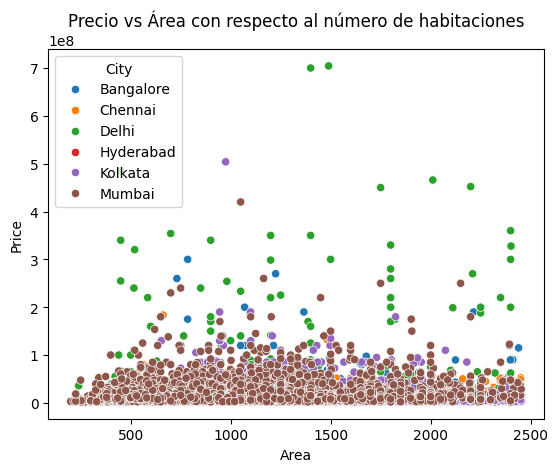

In [17]:
sns.scatterplot(x='Area', y='Price', data=data_sin_atipicos, hue='City')
plt.title('Precio vs Área con respecto al número de habitaciones')
plt.show()

- ✂️ Ahora el área de las casas están en un rango de 0 a 2500
- ✂️ Las casas más caras siguen siendo las de Delhi

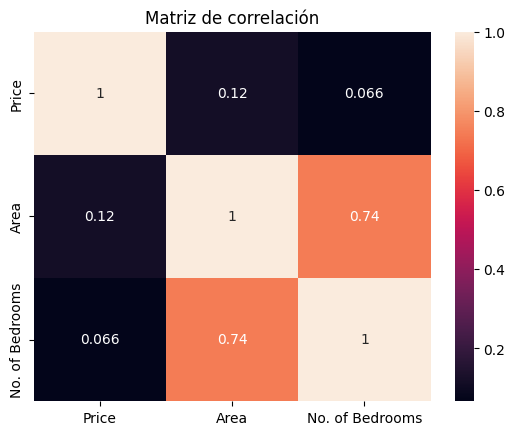

<Figure size 800x800 with 0 Axes>

In [18]:
matriz_correlacion = data_sin_atipicos.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación")
plt.figure(figsize=(8, 8))
plt.show()

- 📊 Ahora la correlación entre 'Price' y 'No. Of Bedrooms' es más baja/débil.
- 📊 La correlación entre 'Price' y 'Area' pasó de moderada a débil.

## **⌨️ Codificación de variables categoricas**

In [38]:
primeras_localidades = data_sin_atipicos['Location'].value_counts()
primeras_localidades = primeras_localidades.head(52)
primeras_localidades

New Town                            668
Kharghar                            555
Thane West                          499
Mira Road East                      452
Rajarhat                            401
Uttam Nagar                         375
Noida                               341
Ulwe                                327
Tangra                              325
Dwarka Mor                          302
Garia                               297
Dum Dum                             282
Howrah                              271
Behala                              226
Vasant Kunj                         205
Nala Sopara                         201
Tollygunge                          197
Medavakkam                          196
Madhyamgram                         195
Borivali West                       190
Kalyan West                         184
Narendrapur                         183
Begur                               176
Keshtopur                           173
Malad West                          172


In [41]:
data_sin_atipicos['City'].value_counts()

Mumbai       6757
Kolkata      5993
Bangalore    5001
Chennai      4089
Delhi        3826
Hyderabad    1759
Name: City, dtype: int64

In [21]:
# Separación de datos categóricos
datos_categoricos = data_sin_atipicos.select_dtypes(include=['object'])
datos_categoricos

,City,Location
1,Bangalore,Dasarahalli on Tumkur Road
2,Bangalore,Kannur on Thanisandra Main Road
3,Bangalore,Doddanekundi
4,Bangalore,Kengeri
5,Bangalore,Horamavu
...,...,...
29130,Mumbai,Mira Road East
29131,Mumbai,Naigaon East
29132,Mumbai,Shirgaon
29133,Mumbai,Mira Road East
